# Análise explanatória  (EDA)

*** Objetivos: ***

* Entender o que é e como aplicar um workflow 
* Entender o modelo, entender o conceito de métricas aplicar avaliação de regras de negócio.
* Aplicar análise explanatoria, técnicas de estatística, queries e afins.
* Entendimento de modelos.
* Data handling.
* Modelo de dados (tratamento de data missing, outliers)
* Criação de apresentação de dados com jupyter


## Workflow - Engenharia de Software  

Para que haja um entendimento completo e um projeto organizado orienta-se seguir algum método de engenharia de software definindo um workflow, existens alguns workflows famosos utilizados no mercado como por exemplo [Crisp-dm](https://www.kdnuggets.com/2014/10/crisp-dm-top-methodology-analytics-data-mining-data-science-projects.html) e o [Microsoft Workflow for Data Science](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle-business-understanding) ambos os modelos são totalmente aplicáveis e utilizados para o trabalho de um cientista de dados, tais técnicas são fundamentais para o trabalho em grupo. 
Nesse artigo ultilizaremos o Microsoft Workflow, que se baseia nos seguintes passos:

+ Business Understanding
+ Data Acquisition and Understanding
+ Modeling
+ Deployment
+ Customer Acceptance

![image.png](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/overview/tdsp-lifecycle2.png)

Fonte [Microsoft Data Science](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle-business-understanding)

*** 1 - Business understanding ***

A parte de entendimento do negócio se baseia no entendimento do modelo, métricas e variáveis. Nessa fase estuda-se o modelo, define o problema a ser resolvido e as métricas ultilizadas para que seu resultado seja válido e impactante no negócio.


*** 2 Data acquisition and understanding *** 

Na aquisição dos dados o objetivo é agrupar os dados e desenvolver seu dataset tendo em vista a criação de um dataset limpo e de qualidade, essa parte do projeto é a mais trabalhosa principalmente pela função da limpagem dos dados, em casos onde o profissional trabalha com dados não estruturados essa parte do projeto pode levar até meses. 

Na fase de aquisição dos dados também é necessária a definição da arquitetura ultilizada no projeto, precisa-se ultilizar uma visão analítica e avaliar seu dataset e assim definir quantas pipelines você irá ultilizar, se o projeto utilizará um cluster x ou y, se necessitará de uma arquitetura de clusterização como handop e etc. 

*** 3 Modeling *** 

Aqui na modelagem você deve determinar qual modelo de machine learning ou modelo estatístico utilizado.
Uma das partes mais importantes nesse estágio é a separação do seu dataset em treino e teste, geralmente existem abordagens como 60-40 onde voce faz uma divisão em seu dataset com 60% treino e 40% teste até técnicas mais trabalhadas como walking forward algorithm que se encarrega de efetuar inúmeras divisões em seu modelo para facilitar a validação futura.

Nesse passo específico você pode seguir a seguinte abordagem

* *** Divida seu dataset *** como por exemplo uma divisão 60 - 40
* *** Treine inúmeros modelos *** Treine vários modelos de dados, teste inúmeros algorítmos.
* *** Teste  e valide os modelos *** Execute os testes com todos os modelos treinados, ultilize técnicas como cross validation e A/B testing
* *** Determine a "melhor" solução ***  Escolha o algoritmo que representa os melhores resultados nos testes, os melhores modelos irão para produção. No estágio de produção monitore constantemente seus resultados, retire as métricas e avalie elas calmamente.

*** 4 Deployment *** 

No passo de desenvolvimento você vai montar o projeto para o usuário final, tenha criatividade e utilize o melhor das técnicas de visualização como:

+ Online websites
+ Spreadsheets
+ Dashboards
+ Line-of-business applications
+ Back-end applications

*** 5 Customer acceptance *** 

Agora você ja está terminando o projeto revise seu modelo, reveja todos os detalhes e principalmente *** garanta que você está entregando o que seu cliente realmente quer ***  e receba o feedback. Caso necessário reveja os passos anteriores.




#  Workflow, análise explanatória Medical Cost Personal Datasets

Para demostração ultiliza-se o [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)  esse dataset é abordado no livro [Machine Learning with R by Brett Lantz](https://www.amazon.com.br/Machine-Learning-R-Brett-Lantz/dp/1782162143) e tais dados são de domínio publico, esse dataset e outros do livro se encontram para download [aqui](https://github.com/stedy/Machine-Learning-with-R-datasets).

*** 1 - Business understanding ***

Com esse dataset são possíveis inúmeras análises estatísticas e permite uma análise explanatória ideal, também pode ser ultilizada com machine learning para predição de custo, regressões lineares e afins.

Colunas 
- age: Idade do beneficiário.

- sex: Gênero explicito como: female, male.

- bmi: Do inglês Body Mass Index, o índice de massa corporal, é calculado como:  $$rac{peso(kg)}{altura(m)^2}$$  e os valores ideais estão entre 18,5 a 24,9.

- children: Número de crianças cobertas pelo plano de saúde.

- smoker: Fumante ou não.

- region: Região dos EUA onde o beneficiário vive, northeast, southeast, southwest, northwest.

- charges: Custo pago pelo plano de  saúde.

Entendimento do modelo:

*** Questionar sobre ***  
+ "O que posso extrair com esses dados?"
+ "O quais dados posso cruzar?"
+ "Quão importante é essa pesquisa?"
+ "Quão impactante é essa pesquisa?"

*** 2 Data acquisition and understanding ***

*** 1 - Limpeza dos dados - tratando missing data ***
No dataset foram inseridos alguns campos Nan e campos com valores em branco o primeiro passo após o download do dataset e carregar os dados  é remover tais campos pois eles contém informações inválidas. No nosso caso faremos o descarte total das linhas.

*** Obs 2: *** A partir de agora ultilizaremos o python. Considerando que você ja tenha lido a [aula 1](https://github.com/araramakerspace/CursoDataScience/blob/master/Aula1-pandas%2Bmatplot/aula1.ipynb)


*** Obs 2: *** O pandas dedicou uma pagina exclusiva para tratamento de data missing [aqui](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

Primeiro executamos o metodo head() do pandas para mostrar os primeiros elementos em seguida o método isna() que verifica as dataMissing e retornam verdadeiro ou falso





In [1]:
import pandas as pd #biblioteca para manupular os dataframes
import matplotlib.pyplot as plt #biblioteca para gráficos
import seaborn as sns  #biblioteca para gráficos
import numpy as np #biblioteca algebra linear

#habilita iteração com os gráficos
# %matplotlib notebook

%matplotlib inline

df = pd.read_csv("insurance.csv")

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.9,0,yes,NaN,16884.92400
1,19.0,female,27.9,0,yes,southwest,16884.92400
2,18.0,male,33.77,1,no,southeast,1725.55230
3,NaN,male,33.77,1,no,southeast,1725.55230
4,28.0,male,33,3,no,southeast,4449.46200
5,28.0,male,33,3,no,NaN,4449.46200
6,33.0,male,22.705,0,no,northwest,21984.47061
7,32.0,male,28.88,0,no,northwest,3866.85520
8,32.0,male,NaN,0,no,NaN,3866.85520
9,31.0,female,25.74,0,no,southeast,3756.62160


In [2]:
#df.isna()

*** Executamos o comando shape para verificar quantas linhas temos antes da remoção  *** 

In [3]:
df.shape #verificar  o numero de linhas e colunas

(1346, 7)

*** Para remover as datas missing ultiliza-se o comando df.dropna() para apagar as linhas NaN*** 

Outros argumentos para dropna()
* df.dropna()     # Apaga as linhas que possuem Nan
* df.dropna(how='all')     # Apaga somente as colunas em que todos os valores são NaN
* df.dropna(thresh=2)   # Apaga coluna somente se houverem duas ocorrências de NaN
* df.dropna(subset=[1])   # Apagar somente uma coluna em específico


In [4]:
df = df.dropna()

*** Executamos novamente shape para verificar o valor pós execução. Constatamos que 6 linhas foram excluidas *** 

In [5]:
df.shape

(1339, 7)

### Como aprendemos na aula 1 o primeiro passo é usar o método describe para obter um resumo estatístico e verificar ocorrência de outliers


In [6]:
df.bmi.describe()

count     1339
unique     549
top       32.3
freq        13
Name: bmi, dtype: object

## Tipos de variáveis 

Para realizar análises mais sólidas um passo importante é a classificação de variáveis, pois técnicas como regressão linear e outras não são aplicáveis em variáveis categóricas.

* *** Variável categórica ***
As variáveis categóricas contêm um número finito de categorias ou grupos distintos. Os dados categóricos podem não ter uma ordem lógica. Por exemplo, os preditores categóricos incluem gênero, tipo de material e método de pagamento.
* *** Variável discreta ***
Variáveis discretas são variáveis numéricas que têm um número contável de valores entre quaisquer dois valores. Uma variável discreta é sempre numérica. Por exemplo, o número de reclamações de clientes ou o número de falhas ou defeitos.
* *** Variável contínua ***
Variáveis contínuas são variáveis numéricas que têm um número infinito de valores entre dois valores quaisquer. Uma variável contínua pode ser numérica ou de data/hora. Por exemplo, o comprimento de uma peça ou a data e hora em que um pagamento é recebido.

fonte [minitab](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)


Nossas variáveis categóricas são sex, smoker e region, para deixar isso explícido ao pandas utiliza-se o método Categorical.
A variavel bmi é representada como numérica, então explicitamos

In [7]:
df['sex'] = pd.Categorical(df['sex'])
df['smoker'] = pd.Categorical(df['smoker'])
df['region'] = pd.Categorical(df['region'])
df['bmi'] = df['bmi'].apply(pd.to_numeric, errors='coerce')

# Conhecendo o DataSet

#### Para entender melhor nossos dados começamos a plotar algumas informações relevantes

# Distribuição Regional

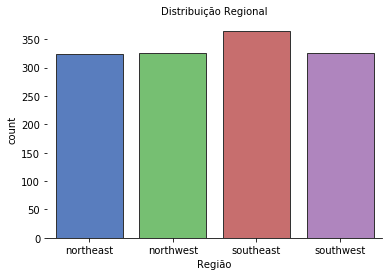

In [8]:
f,ax = plt.subplots()
sns.countplot(x='region', data=df, palette="muted",orient='v',ax=ax,edgecolor='0.2')
ax.set_xlabel("Região", fontsize=10)
ax.set_title("Distribuição Regional", fontsize=10)
x_axis = ax.axes.get_yaxis().set_visible(True)
sns.despine(left=True)
plt.show()

## Distribuição por faixa etária

Para realizar a distribuição por faixa etária o ideal é a construção de dois gráficos, idade e a classificação por faixa etária.

O padrão brasileiro de distribuição de idade disponível [aqui](https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Faixas_et%C3%A1rias_do_Brasill) onde:

Algumas modificações são seguidas no nosso modelo pois as crianças já possúem uma coluna própria por entrarem como dependentes no plano de saúde. Nós usaremos o padrão Americano pois nossos dados são dos EUA.

+ Adolescente: até 17
+ Adulto-Jovem: 17-29
+ Adulto: 35-50
+ Idosos: acima de 65


Abaixo um exemplo de como realizar o mesmo:

In [9]:
#Criando coluna de categoria de idade
cut_points = [17,20,35,50,65]
label_names = ['Adol',"Adulto Jovem","Adulto","Idoso"]

#criação do plot 1 
df["age_category"] = pd.cut(df["age"],cut_points,labels=label_names) #cria coluna no da

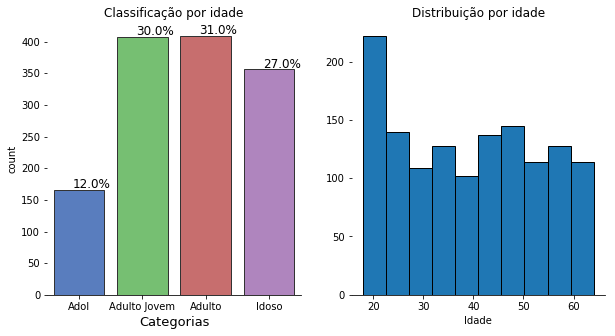

In [10]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
#cria o gráfico 1
sns.countplot(x='age_category',data=df,palette='muted',orient='v',ax=ax1,edgecolor='0.2')

#Calcula a porcentagem dos valores
for i in ax1.patches: 
    ax1.text(i.get_x()+0.3, i.get_height()+3, \
            str(round((i.get_height()/df.age_category.shape[0])*100))+'%', fontsize=12,
                color='black') 
    

ax1.set_xlabel("Categorias", fontsize=13)
ax1.set_title("Classificação por idade")

ax2.hist('age', bins=10,data=df, edgecolor='black')
ax2.set_xlabel('Idade')
ax2.set_title('Distribuição por idade')

x_axis = ax1.axes.get_yaxis().set_visible(True)

f.subplots_adjust()
sns.despine(left=True)
plt.show()

# Cruzando dados - Data Handling

Para ficar mais interessante cruzamos os dados obtidos anteriormente.

Cria-se a função distr_genero que recebe como argumento o parametro do dataframe que desejamos separar em função do gênero (***nesse caso variáveis categóricas***), no caso age_category (idade). Dessa forma pode-se reaproveitar a função para plotar outras características em função do gênero.

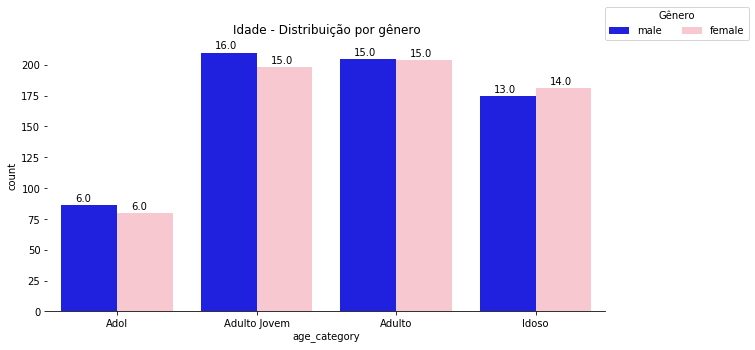

In [11]:
def distr_genero(x_val,title):
    f,ax = plt.subplots(figsize=(10,5))
    
    sns.countplot(x=x_val, data=df, palette=['blue','pink'],hue='sex',hue_order=['male','female'])
    
    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+3, \
                str(round((i.get_height()/df.region.shape[0])*100))) 
    
    ax.set_title(title +' Distribuição por gênero')

    ax.legend(loc=[1,1],title='Gênero',ncol=2)
    sns.despine(left=True)
    return plt.show()

distr_genero('age_category','Idade -')


***Esse gráfico abre espaço para discussão, porque temos um número maior de adolescentes e adultos do sexo masculino enquanto o número maior de idosos é feminino?***

#### Reaproveitando a função para cruzar o gênero com a localização para sabermos aonde se encontram a maior concentração de homens e mulheres

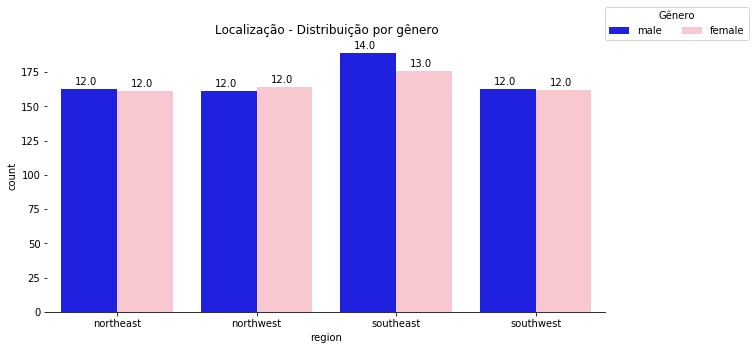

In [12]:
distr_genero('region','Localização -')

#### Reaproveitamos novamente a função criada para separar entre fumantes e não fumantes por gênero

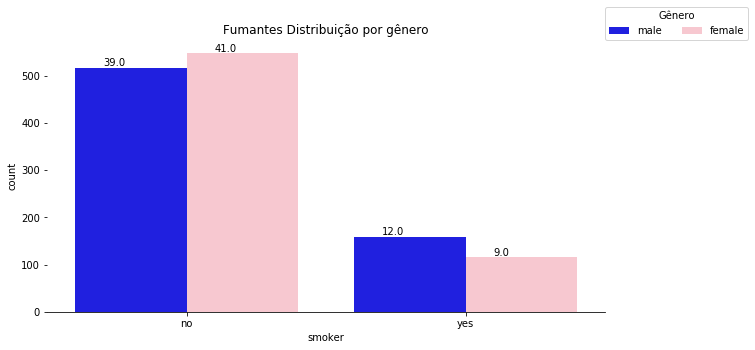

In [13]:
distr_genero('smoker','Fumantes')

***A análise desse gráfico mostra que a maioria dos fumantes são do sexo masculino, isso pode ter a ver com o primeiro gráfico? ***

# Análise da distribuição dos valores dos gastos

#### Distribuição do valor de investimento

/home/gabs/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


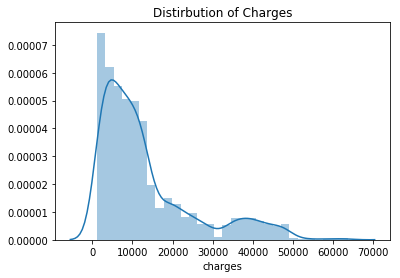

In [14]:
distPlot = sns.distplot(df['charges'])
plt.title("Distirbution of Charges")
plt.show(distPlot)

 O gráfico nos mostra uma inclinação para a direita, visualmente podemos dizer que existem outliers (o valor máximo é 63.770), Continuamos analisando agora dividindo em grupos

### Diferença de gasto em relação ao gênero

*** Gráficos do tipo violino ***
Como interpretar:
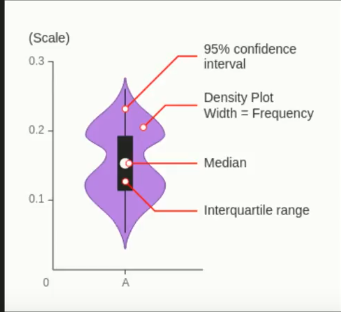

sex
female    12563.049448
male      13956.751178
Name: charges, dtype: float64


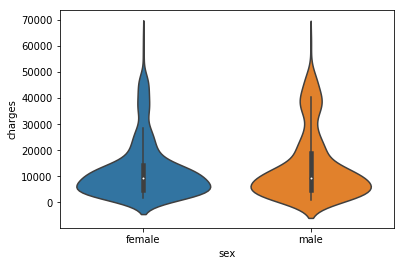

In [15]:
meanGender = df.groupby(by = "sex")["charges"].mean()
print(meanGender)
boxPlot1 = sns.violinplot(x = "sex", y = "charges", data = df)

Pode-se perceber visualmente analisando os violinos que não existem muitas diferenças entre os gêneros, para homens a taxa é "ligeiramente" maior que para as mulheres, cerca de US $1387

# Vamos voltar nossa análise aos fumantes

É muito comum recebermos um dataset e não buscar um objetivo relevante na ADA. 
Então vamos focar os dados e tentar encontrar algum padrão ou diferença em relação aos fumantes.

smoker
no      8434.086440
yes    32050.231832
Name: charges, dtype: float64
23616.14539160891


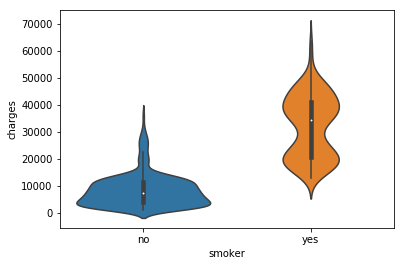

In [16]:
meanSmoker = df.groupby(by = "smoker")["charges"].mean()
print(meanSmoker)
print(meanSmoker["yes"] - meanSmoker["no"])
boxPlot2 = sns.violinplot(x = "smoker", y = "charges", data = df)

### CONCLUSÃO IMPORTANTE, FUMAR É CARO

Agora com base nesse gráfico percebemos que existe uma diferença de US $ 23,615  entre fumantes e não fumantes.
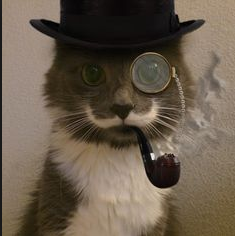

# CONFIRMAÇÃO






Usando regressão linear para cruzar os dados de fumantes, não fumantes com o BMI

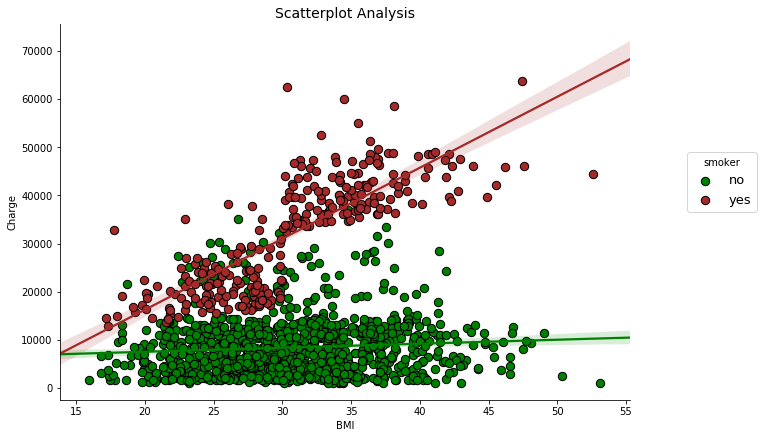

In [24]:
def scatter_analysis(hue_type,palette,data):
    sns.lmplot(x = 'bmi',y='charges',hue=hue_type,data=data,palette=palette,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False)
   
    plt.title('Scatterplot Analysis',fontsize=14)
    plt.xlabel('BMI')
    plt.ylabel('Charge')
    plt.legend(loc=[1.1,0.5],title = hue_type, fontsize=13)
plt.show()
scatter_analysis('smoker',['Green','brown'],df)

+ Com esse gráfico podemos afirmar com convicção que geralmente é cobrado mais de fumantes que não fumantes.
+ A medida que o peso (bmi) do fumante aumenta o preço também aumenta, causando uma *** relação linear ***
+ Para quem não é fumante, a cobrança tende a ser inconsistente, independentemente do valor da IMC.

##  Análise de correlação
A ferramenta Matriz de Correlação permite calcular a correlação entre variáveis através dos coeficientes de Pearson, Spearman ou Kendall. A opção de gráfico permite gerar uma Matriz de Scatterplots.
Considerando dois vetores aleatórios $ x $ e $ y $ de tamanhos $ n $ com médias $ \bar{x} $ e $ \bar{y} $ respectivamente. O coeficiente de correlação entre essas variáveis pode ser calculado por:

+ Coeficiente de Pearson
$$\rho = \dfrac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n} (y_i-\bar{y})^2}}$$	
+ Coeficiente de Spearman
$$\rho = 1 - \dfrac{6\sum_{i=1}^{n} d_i^2}{(n^3-n)}$$	
onde $ d_i $ é a diferença entre cada posição de $ x $ e $ y $.

+ Coeficiente de Kendall
$$\tau = \dfrac{2(n_c - n_d)}{n(n-1)}$$	
onde $ n_c $ é o número de pares concordantes e $ n_d $  é o número de pares discordantes do conjunto de dados.

*** Referências *** 
Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) The New S Language. Wadsworth & Brooks/Cole.

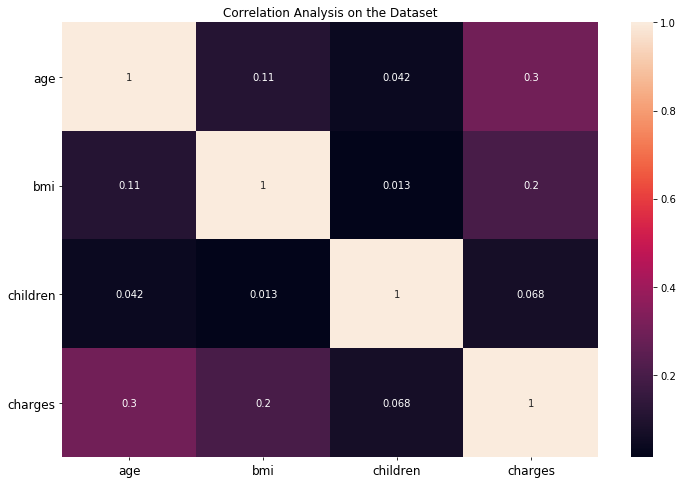

In [25]:
plt.figure(figsize=(12,8))
kwargs = {'fontsize':12,'color':'black'}
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Analysis on the Dataset')
plt.tick_params(length=3,labelsize=12,color='black')
plt.yticks(rotation=0)
plt.show()

A análise do conjunto de dados como um todo mostra apenas uma forte correlação com a Idade, mas sabemos, a partir do gráfico de dispersão acima, que eles podem ser uma correlação com o IMC se você for um fumante. Então, vamos dividir o conjunto de dados em duas partes como mencionado acima e realizar a análise em cada categoria

# Confirmando estatisticamente

In [33]:
# remove variavel categorica

#df.drop(['age_category'],axis=1,inplace=True)

# remove nao fumantes
df_smoker = df[df.smoker=='yes']

# transforma os dados smokers para numerico
df_smoker = pd.get_dummies(df_smoker,drop_first=True)
from scipy.stats import pearsonr


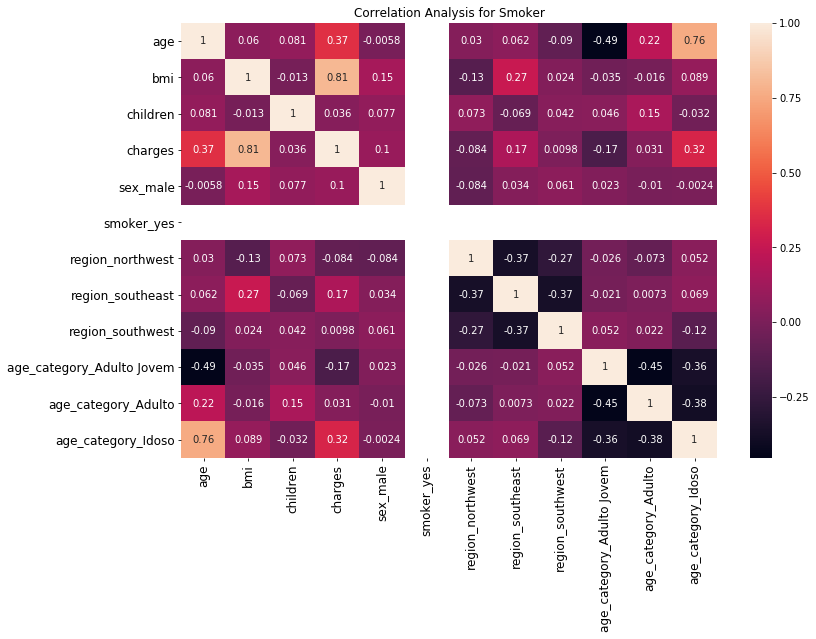

In [34]:
plt.figure(figsize=(12,8))
kwargs = {'fontsize':12,'color':'black'}
sns.heatmap(df_smoker.corr(),annot=True,robust=True)
plt.title('Correlation Analysis for Smoker',**kwargs)
plt.tick_params(length=3,labelsize=12,color='black')
plt.yticks(rotation=0)
plt.show()

In [35]:
df_smoker.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_category_Adulto Jovem,age_category_Adulto,age_category_Idoso
1,19.0,27.90,0,16884.9240,0,1,0,0,1,0,0,0
18,62.0,26.29,0,27808.7251,0,1,0,1,0,0,0,1
21,27.0,42.13,0,39611.7577,1,1,0,1,0,1,0,0
27,30.0,35.30,0,36837.4670,1,1,0,0,1,1,0,0
31,34.0,31.92,1,37701.8768,0,1,0,0,0,1,0,0


Existe uma forte Correlação entre os parâmetros e encargos da IMC e idade. No entanto, não há correlação entre outros parâmetros.

Conclusão:
    
    Os fatores que levam a um maior gasto em plano de saúde além do fumo são idade e peso.

No handles with labels found to put in legend.


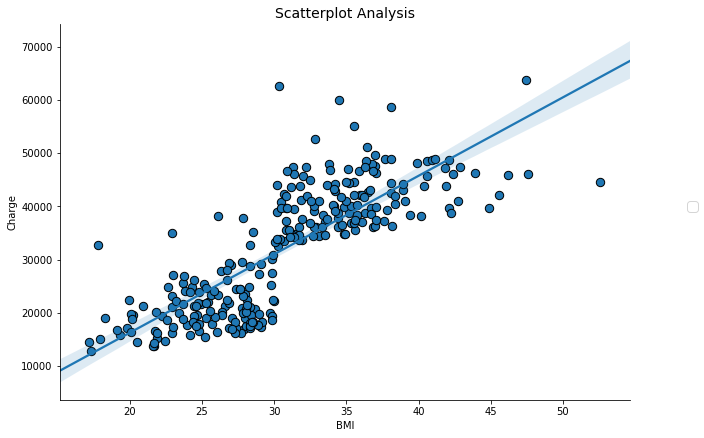

In [36]:
df_smoker.drop(['children','sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],axis=1,inplace=True)
scatter_analysis(None,['ForestGreen','saddlebrown'],df_smoker)

Chegando a conclusão que o gasto relacionado com o peso e se você é ou não fumante apresenta um modelo linear, podemos então encontrar uma função que caracteriza o comportamento, assim criar padrões de pagamento, aplicativos e produtos afins. Portanto, podemos então usar um modelo linear para a análise de inclinação, também chamado de Regressão Linear Multivariada

